In [57]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import circlify

In [3]:
url = 'https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/7_OneCatOneNum.csv'
df = pd.read_csv(url)
updated_df = df.dropna()

# Lollipop Plot

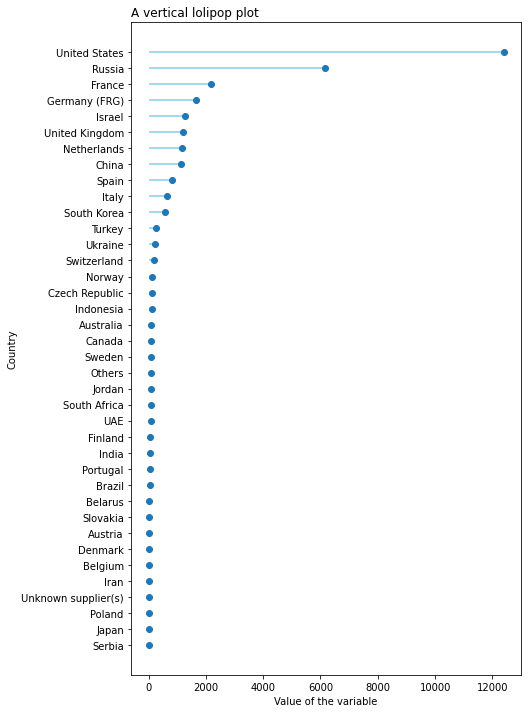

In [13]:
ordered_df = updated_df.sort_values(by='Value')
my_range=range(1,len(updated_df.index)+1)

plt.figure(figsize=(7,12)) 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Value'], color='skyblue')
plt.plot(ordered_df['Value'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['Country'])
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Country')

# Show the plot
plt.show()

# Bar Plot

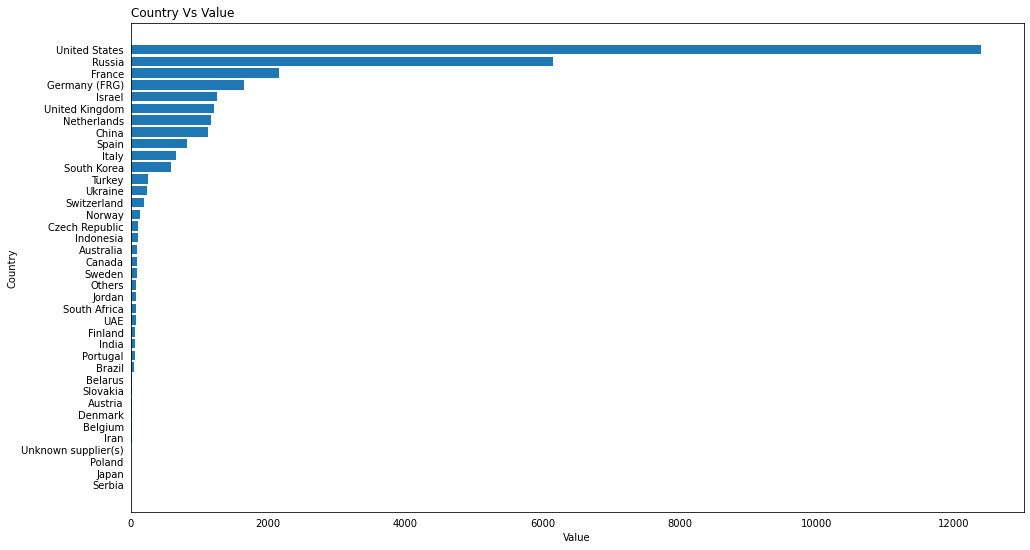

In [25]:
ordered_df = updated_df.sort_values(by='Value')

fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(ordered_df['Country'], ordered_df['Value'])

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
ax.set_title('Country Vs Value',loc ='left')
ax.set_ylabel('Country')
ax.set_xlabel('Value')
 
plt.show()


# Circular Barplot

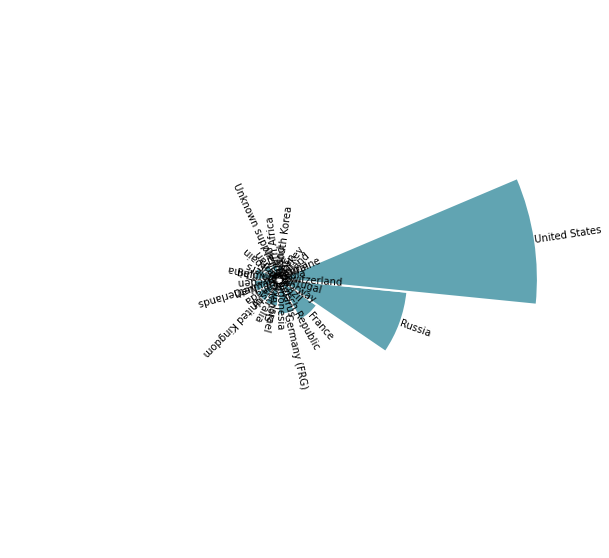

In [47]:
# initialize the figure
plt.figure(figsize=(40,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = ordered_df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * ordered_df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 0.5

# Compute the angle each bar is centered on:
indexes = list(range(1, len(ordered_df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, ordered_df["Country"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

# Treemap

In [55]:
fig = px.treemap(updated_df, path=['Country'], values = 'Value',width=800,height=400)
#fig.update_layout()
fig.show()

# Circle Packing

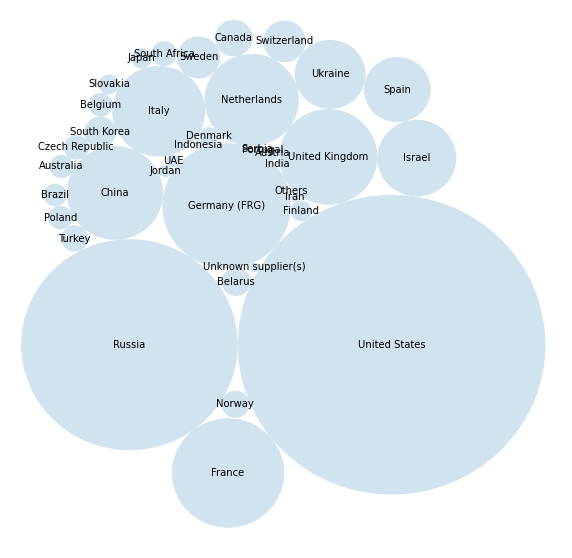

In [78]:
circles = circlify.circlify(
    updated_df['Value'].tolist(), 
    show_enclosure=True, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

fig, ax = plt.subplots(figsize=(10,10))

ax.axis('off')

lim = 1
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

labels = updated_df['Country'][::-1].tolist()

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=10))
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )

